In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras


In [26]:
df = pd.read_csv(r'C:\Users\kaif\Downloads\iris\Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [29]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [31]:
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [32]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [33]:
print(y[:5])

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [35]:
x_train.shape

(105, 4)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
print(x_train[:1])
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train[:1])

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
57            4.9           2.4            3.3           1.0
[[-1.14630942 -1.44374444 -0.25650655 -0.258263  ]]


In [37]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [39]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

In [40]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.fit(x_train, y_train, epochs=100, verbose=2)

Epoch 1/100


4/4 - 1s - loss: 1.0228 - accuracy: 0.4095 - 1s/epoch - 367ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0187 - accuracy: 0.4667 - 17ms/epoch - 4ms/step
Epoch 3/100
4/4 - 0s - loss: 0.9384 - accuracy: 0.5333 - 14ms/epoch - 3ms/step
Epoch 4/100
4/4 - 0s - loss: 0.8950 - accuracy: 0.5905 - 19ms/epoch - 5ms/step
Epoch 5/100
4/4 - 0s - loss: 0.8393 - accuracy: 0.6857 - 17ms/epoch - 4ms/step
Epoch 6/100
4/4 - 0s - loss: 0.7974 - accuracy: 0.6857 - 25ms/epoch - 6ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8012 - accuracy: 0.7048 - 20ms/epoch - 5ms/step
Epoch 8/100
4/4 - 0s - loss: 0.7740 - accuracy: 0.7143 - 13ms/epoch - 3ms/step
Epoch 9/100
4/4 - 0s - loss: 0.7329 - accuracy: 0.7333 - 17ms/epoch - 4ms/step
Epoch 10/100
4/4 - 0s - loss: 0.6737 - accuracy: 0.7619 - 16ms/epoch - 4ms/step
Epoch 11/100
4/4 - 0s - loss: 0.6788 - accuracy: 0.7810 - 17ms/epoch - 4ms/step
Epoch 12/100
4/4 - 0s - loss: 0.6340 - accuracy: 0.8000 - 17ms/epoch - 4ms/step
Epoch 13/100
4/4 - 0s - loss: 0.6027 - accuracy

4/4 - 0s - loss: 0.1439 - accuracy: 0.9619 - 13ms/epoch - 3ms/step
Epoch 99/100
4/4 - 0s - loss: 0.1375 - accuracy: 0.9714 - 15ms/epoch - 4ms/step
Epoch 100/100
4/4 - 0s - loss: 0.1301 - accuracy: 0.9619 - 14ms/epoch - 4ms/step


In [42]:
prediction = model.predict(x_test)
print(prediction[:5])

2/2 [==============================] - 0s 15ms/step
[[9.9968553e-01 3.1370355e-04 8.1857786e-07]
 [1.0231685e-02 9.2282403e-01 6.6944294e-02]
 [9.9891257e-01 1.0841525e-03 3.3420706e-06]
 [2.5532872e-05 6.4397096e-03 9.9353468e-01]
 [9.9857676e-01 1.4180880e-03 5.0860017e-06]]


In [43]:
prediction = np.argmax(prediction, axis=-1)
print(prediction[:5])

[0 1 0 2 0]


In [44]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int32


In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, prediction))

0.9777777777777777


In [46]:
cm = confusion_matrix(y_test, prediction)
print(cm)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.72222222222221, 0.5, 'actual')

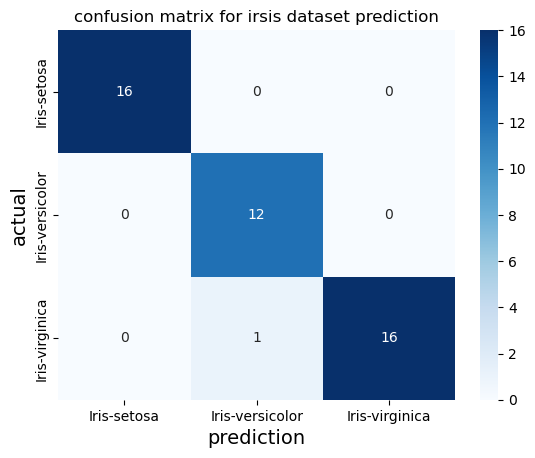

In [51]:
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)